### Referencias

#### O Códig ofoi adaptado do exemplo disponível em: 
http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html

#### Foram também utilizadas referencias do trabalho de Diogo Henriques Freitas Nunes , disponível em:
https://estudogeral.sib.uc.pt/bitstream/10316/48034/1/Tese_DiogoNunes.pdf






INTERAÇÃO -> 1 DIFERENÇA CENTROIDS -> 23.280382258379657
INTERAÇÃO -> 2 DIFERENÇA CENTROIDS -> 5.424935013732314
INTERAÇÃO -> 3 DIFERENÇA CENTROIDS -> 7.05326457188186
INTERAÇÃO -> 4 DIFERENÇA CENTROIDS -> 5.782172537310763
INTERAÇÃO -> 5 DIFERENÇA CENTROIDS -> 4.70409661608535
INTERAÇÃO -> 6 DIFERENÇA CENTROIDS -> 3.8526273681812553
INTERAÇÃO -> 7 DIFERENÇA CENTROIDS -> 3.1865786454457368
INTERAÇÃO -> 8 DIFERENÇA CENTROIDS -> 2.649908251610933
INTERAÇÃO -> 9 DIFERENÇA CENTROIDS -> 2.2578039459640182
INTERAÇÃO -> 10 DIFERENÇA CENTROIDS -> 1.945766815435357
INTERAÇÃO -> 11 DIFERENÇA CENTROIDS -> 1.698754916953471
INTERAÇÃO -> 12 DIFERENÇA CENTROIDS -> 1.4953333013932368
INTERAÇÃO -> 13 DIFERENÇA CENTROIDS -> 1.3096189253223922
INTERAÇÃO -> 14 DIFERENÇA CENTROIDS -> 1.1698331728741795
INTERAÇÃO -> 15 DIFERENÇA CENTROIDS -> 1.0756474099492597
INTERAÇÃO -> 16 DIFERENÇA CENTROIDS -> 0.9715227584429276
INTERAÇÃO -> 17 DIFERENÇA CENTROIDS -> 0.8817434569845239
INTERAÇÃO -> 18 DIFERENÇA CENTRO

INTERAÇÃO -> 141 DIFERENÇA CENTROIDS -> 0.019967454318114974
INTERAÇÃO -> 142 DIFERENÇA CENTROIDS -> 0.019695138367803455
INTERAÇÃO -> 143 DIFERENÇA CENTROIDS -> 0.019428355462880464
INTERAÇÃO -> 144 DIFERENÇA CENTROIDS -> 0.019166956713811967
INTERAÇÃO -> 145 DIFERENÇA CENTROIDS -> 0.018910798206039914
INTERAÇÃO -> 146 DIFERENÇA CENTROIDS -> 0.018659740801252322
INTERAÇÃO -> 147 DIFERENÇA CENTROIDS -> 0.018413649949011734
INTERAÇÃO -> 148 DIFERENÇA CENTROIDS -> 0.018172395505833272
INTERAÇÃO -> 149 DIFERENÇA CENTROIDS -> 0.017935851563388727
INTERAÇÃO -> 150 DIFERENÇA CENTROIDS -> 0.017703896284204657
INTERAÇÃO -> 151 DIFERENÇA CENTROIDS -> 0.01747641174465464
INTERAÇÃO -> 152 DIFERENÇA CENTROIDS -> 0.01725328378500146
INTERAÇÃO -> 153 DIFERENÇA CENTROIDS -> 0.017034401866256044
INTERAÇÃO -> 154 DIFERENÇA CENTROIDS -> 0.016819658933331372
INTERAÇÃO -> 155 DIFERENÇA CENTROIDS -> 0.016608951283814122
INTERAÇÃO -> 156 DIFERENÇA CENTROIDS -> 0.01640217844288694
INTERAÇÃO -> 157 DIFERENÇA 

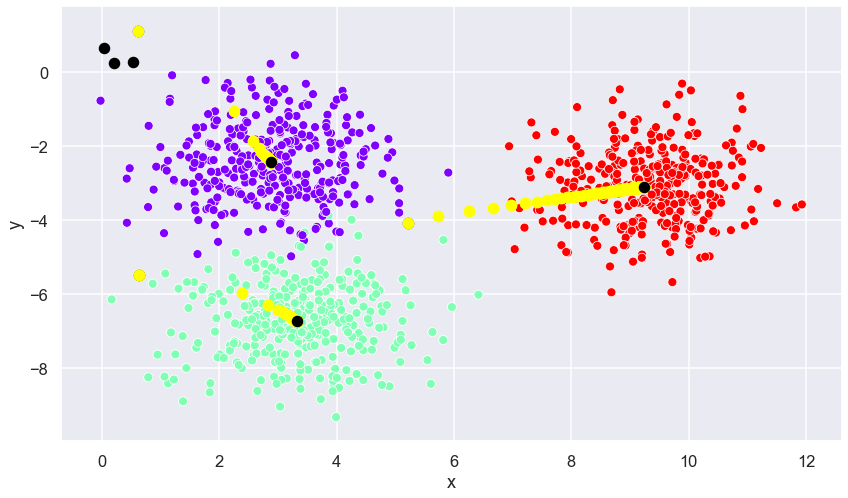

In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
    
def Plot(df1, df2, df3, firstTime, cor):
    sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})
    df = pd.DataFrame(df1, columns=['x', 'y'])
    df['label'] = y
 
    centroids = pd.DataFrame(df2, columns=['x', 'y'])
    oldCentroids = pd.DataFrame(df3, columns=['x', 'y'])

    if firstTime==0:
        _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)
        _ = plt.scatter(centroids.iloc[:,[0]],centroids.iloc[:,[1]] , color='black', s=100)
    else:
        _ = plt.scatter(oldCentroids.iloc[:,[0]],oldCentroids.iloc[:,[1]] , color=cor, s=100)
    
def do_kmeans_clustering(k, X, randon_state, max_iterations):
    # INICAR OS CENTROIDS
    centroids = []
    oldCentroids = []
    clusters = []
    mediaCentroids = 0
    
    random.seed( randon_state )
    
    for i in range(0, k):
        centroids.append([random.random(),random.random()])
    
    oldCentroids = centroids
        
    Plot(X, centroids, oldCentroids, 0, 'yellow')
    for iteration in range(max_iterations):
        
        # INICAR OS CLUSTERS
        for i in range(0, k):
            clusters.append([])
             
        for item in X:
            distancias = [np.linalg.norm(item - centroid) for centroid in centroids]
            classification = distancias.index(min(distancias))
            clusters[classification].append(item)
                
        oldCentroids = []
        for i in range(0, len(centroids)):
            oldCentroids.append([0,0])
            
        for i in range(0,len(centroids)):  
            oldCentroids[i] = centroids[i]         
            centroids[i] = np.average(clusters[i], axis = 0)  
        
        Plot(X, centroids, oldCentroids, iteration, 'yellow')
         
        if iteration > 0:            
            mediaCentroids = ((np.mean(centroids) - np.mean(oldCentroids)) * 100.0)
            print('INTERAÇÃO -> {} DIFERENÇA CENTROIDS -> {}'.format(iteration, mediaCentroids))
            if  mediaCentroids <= 0.005:
                Plot(X, centroids, oldCentroids, iteration, 'black')            
                break
            else:               
                Plot(X, centroids, oldCentroids, iteration, 'yellow')
                
    print('DIFERENÇA ENTRE CENTROIDS {}'.format(((np.mean(centroids) - np.mean(oldCentroids)) * 100.0)))
    print(mediaCentroids)
    if iteration < max_iterations:
        print('CONVERGIU EM {} INTERAÇÕES'.format(iteration)) 
    else:
         print('NÃO CONVERGIU EM {} INTERAÇÕES'.format(iteration)) 
    return centroids, oldCentroids, clusters, classification, distancias, X




'''
TESTANDO O METODO K-MEANS
'''

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=30)
	

centroids, oldCentroids, clusters, classification, distancias, r = do_kmeans_clustering(3, X, 30, 500)


